# Practice 9.29
## First Neural Network to simulate a function 

In [1]:
import torch as t
import matplotlib.pyplot as plt

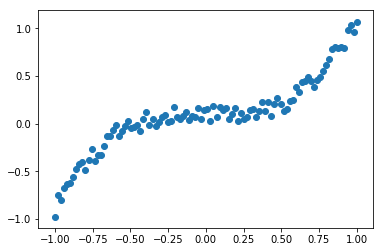

In [95]:
x = t.unsqueeze(t.linspace(-1,1,100),dim=1)
y = x.pow(3) + 0.2*t.rand(x.size())

plt.scatter(x.numpy(),y.numpy())
plt.show()

In [96]:
import torch.nn as nn
import torch.nn.functional as F

In [97]:
class Net(nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = nn.Linear(n_feature,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
net = Net(1,11,1)
print(net)
        
        

Net(
  (hidden): Linear(in_features=1, out_features=11, bias=True)
  (predict): Linear(in_features=11, out_features=1, bias=True)
)


In [98]:
params = list(net.parameters())
print(len(params))

4


In [99]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

hidden.weight : torch.Size([11, 1])
hidden.bias : torch.Size([11])
predict.weight : torch.Size([1, 11])
predict.bias : torch.Size([1])


/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


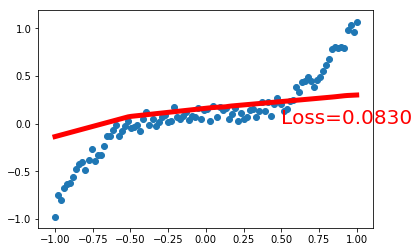

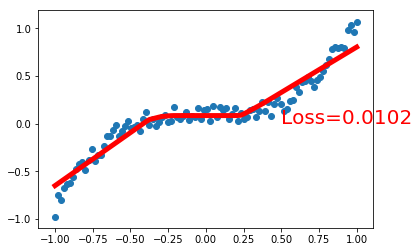

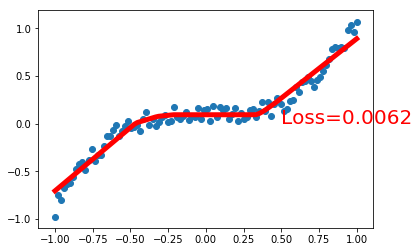

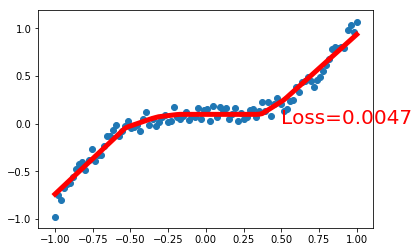

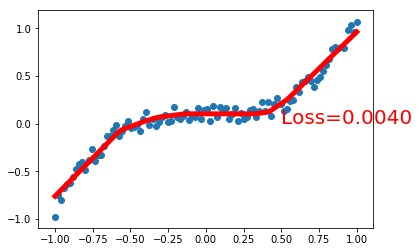

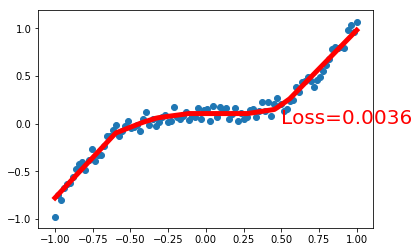

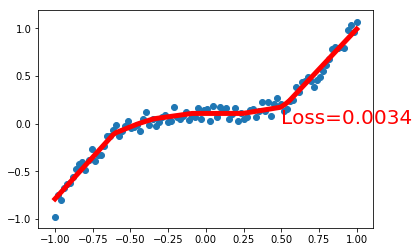

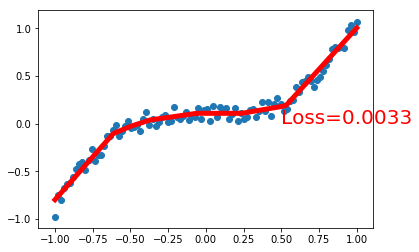

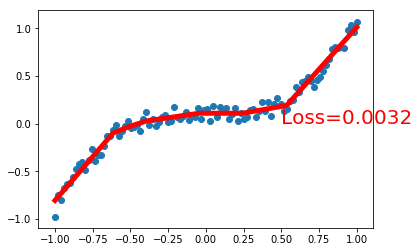

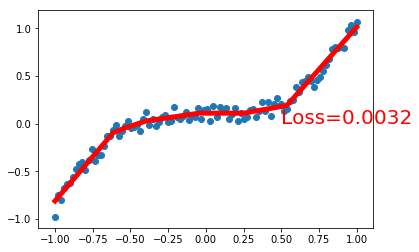

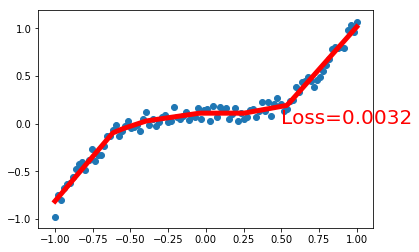

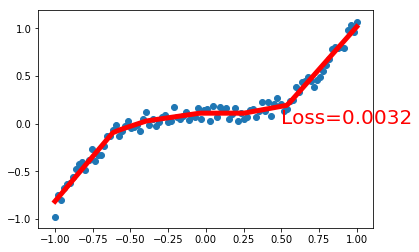

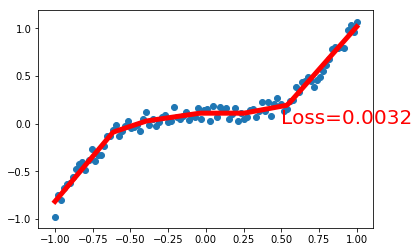

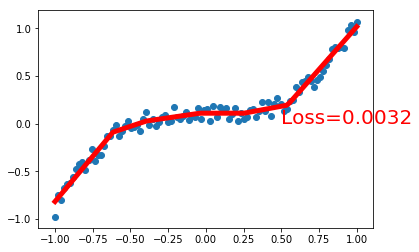

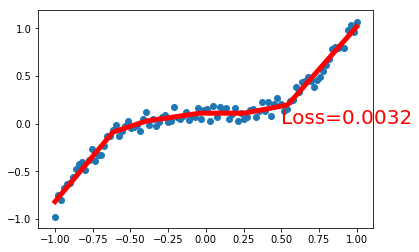

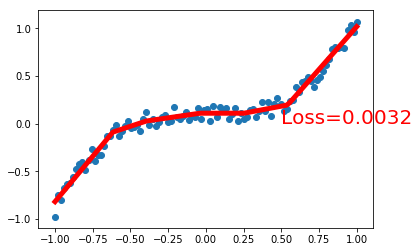

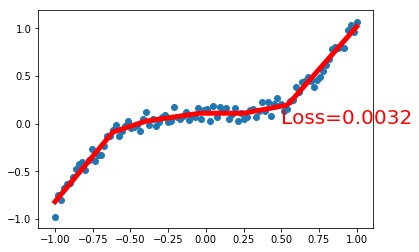

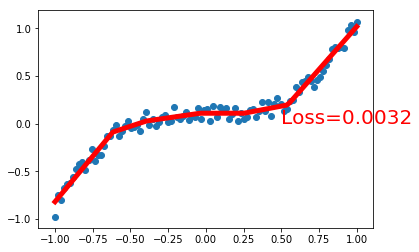

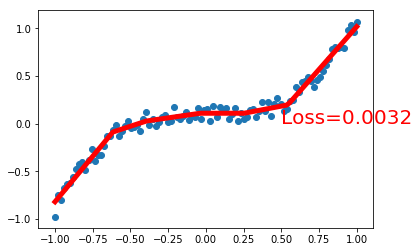

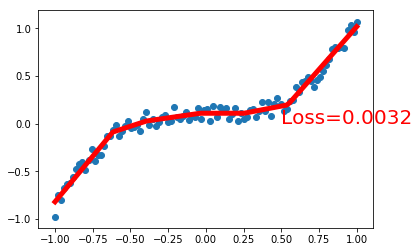

In [100]:
optimizer = t.optim.SGD(net.parameters(),lr=0.5)
loss_func = nn.MSELoss()

plt.ion()
plt.show()

for T in range(1000):
    prediction = net(x)
    
    loss = loss_func(prediction,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if T%50==0:
        plt.cla()
        plt.scatter(x.numpy(),y.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss=%.4f'%loss.data[0],fontdict={'size':20,'color':"red"})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

